In [ ]:
## TEMA 1

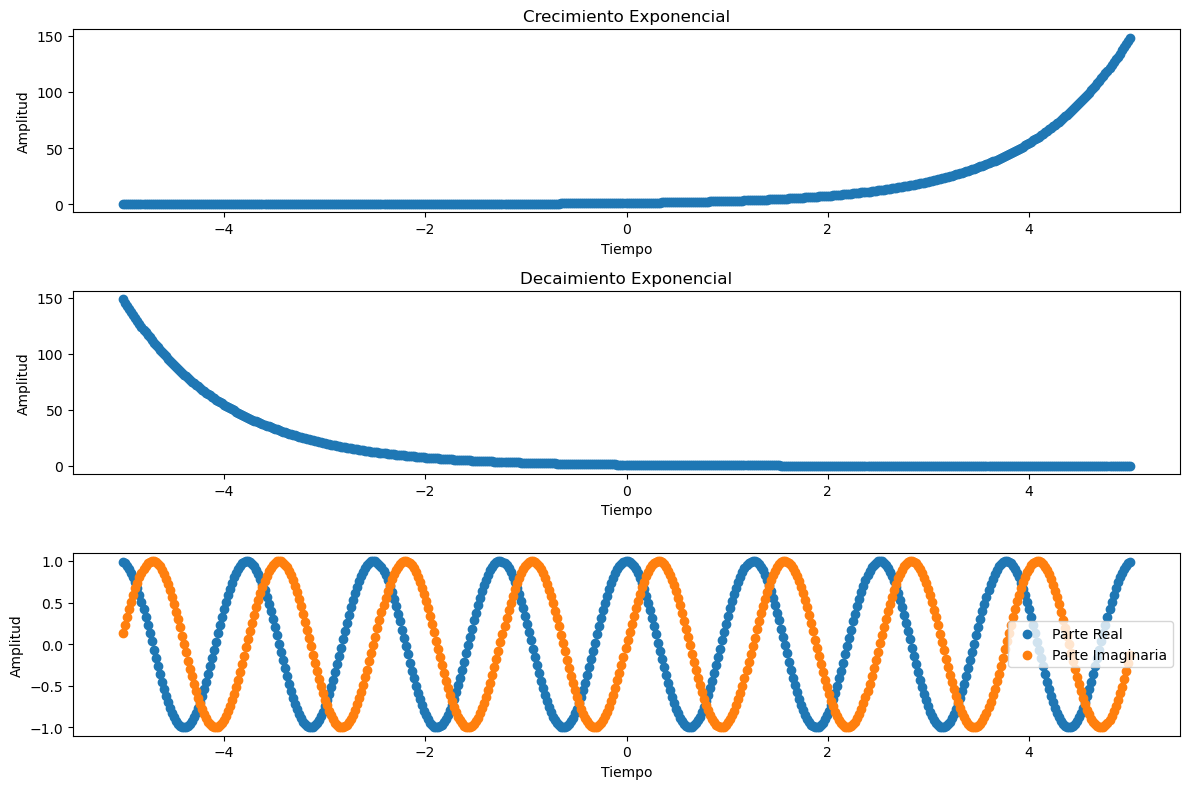

In [7]:
import numpy as np
import matplotlib.pyplot as plt

#Parámetros
t=np.linspace(-5,5,500)

#Señal con crecimiento exponencial
alfa=1
crecimiento_exp = np.exp(alfa*t)

#señal de decaimiento exponencial
decaimiento_exp = np.exp(-alfa*t)

#Señal oscilatoria compleja
omega = 5
exp_compleja = np.exp(1j*omega*t)

#Gráficos
plt.figure(figsize=(12,8))

#Crecimiento exponencial
plt.subplot(3,1,1)
plt.scatter(t,crecimiento_exp)
plt.title('Crecimiento Exponencial')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Decaimiento exponencial
plt.subplot(3, 1, 2)
plt.scatter(t, decaimiento_exp)
plt.title('Decaimiento Exponencial')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

# Señal exponencial compleja
plt.subplot(3, 1, 3)
plt.scatter(t, np.real(exp_compleja), label=("Parte Real"))
plt.scatter(t, np.imag(exp_compleja), label=("Parte Imaginaria"))
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
            
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 2
omega = 3
phi = np.pi / 4
T = 2 * np.pi / omega # Periodo
t = np.linspace(0, T, 500)

# Señal periódica
x = A * np.cos(omega * t + phi)

# Cálculo de energía
energia_total = np.trapezoid(np.abs(x)**2, t)

# Cálculo de potencia
potencia_media = energia_total / T

# Gráfico
plt.plot(t, x)
plt.title('Señal periódica')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

AttributeError: module 'numpy' has no attribute 'trapezoid'

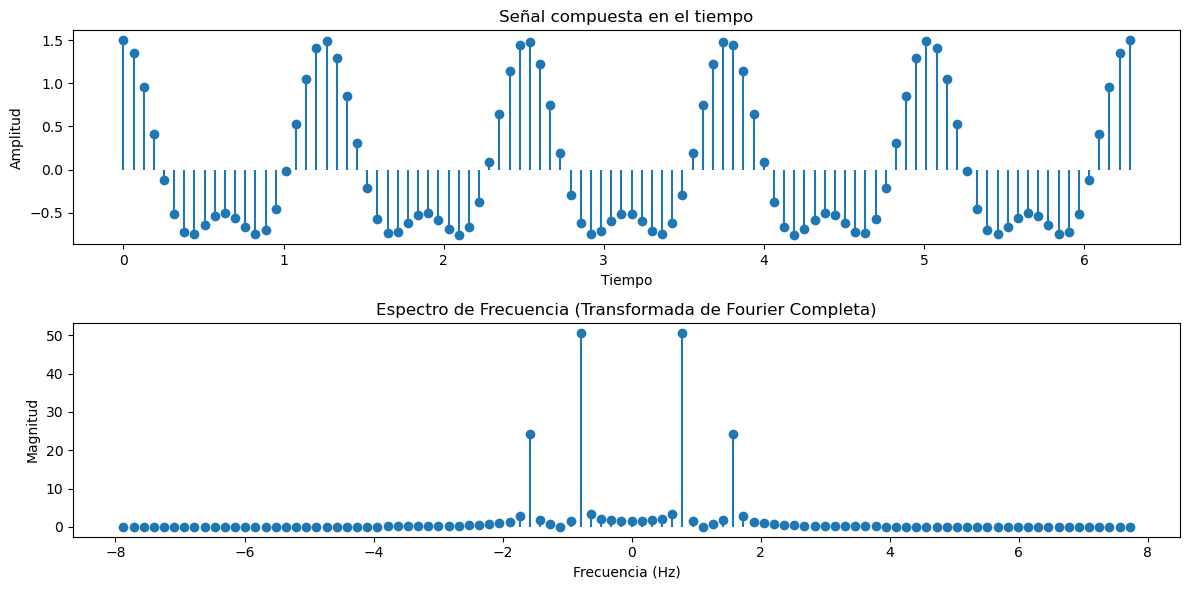

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Parámetros
A1 = 1
A2 = 0.5
omega1 = 5
omega2 = 10
t=np.linspace(0,2*np.pi,100)

# Señal compuesta
x = A1 * np.cos(omega1 * t) + A2 * np.cos(omega2 * t)
# Transformada de Fourier
X_f = np.fft.fft(x)
frecuencias = np.fft.fftfreq(len(t), t[1] - t[0])
# Magnitud de la transformada
X_f_magnitude = np.abs(X_f)
# Graficar señal en el tiempo
plt.figure(figsize=(12, 6))
# Señal en el tiempo
plt.subplot(2, 1, 1)
#plt.stplotem(t, x)
plt.stem(t, x, basefmt=" ")
plt.title('Señal compuesta en el tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
# Espectro de Fourier completo (frecuencias positivas y negativas)
plt.subplot(2, 1, 2)
plt.stem(frecuencias, X_f_magnitude, basefmt=" ")
plt.title('Espectro de Frecuencia (Transformada de Fourier Completa)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.tight_layout()
plt.show()

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


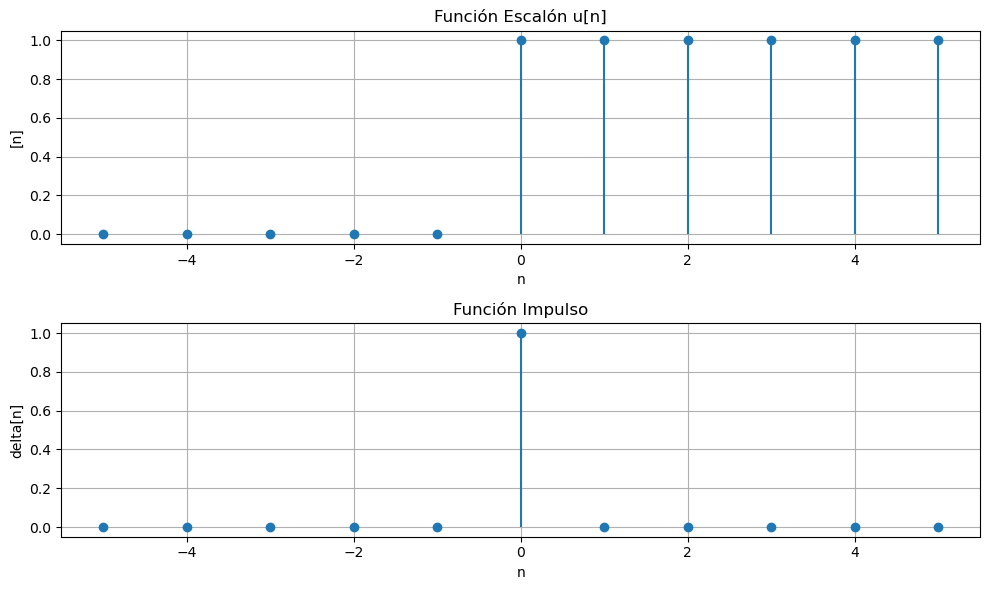

In [12]:
import numpy as np
import matplotlib.pyplot as plt
# Definición de la función escalón unitario
def escalon(n):
    return np.where(n >= 0, 1, 0)

# Definición de la función impulso (calculada como la diferencia entre escalonedef impulso(n):
def impulso(n):
    return escalon(n) - escalon(n-1)

# Rango de valores de n
n = np.arange(-5, 6) # n de -5 a 5
print(n)

# Calcular las funciones
u_n = escalon(n) # Función escalón u[n]
delta_n = impulso(n) # Función impulso delta[n]

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la función escalón
plt.subplot(2, 1, 1)
plt.stem(n, u_n, basefmt=" ")
plt.title("Función Escalón u[n]")
plt.xlabel("n")
plt.ylabel("[n]")
plt.grid(True)

# Graficar la función impulso
plt.subplot(2, 1, 2)
plt.stem(n, delta_n, basefmt=" ")
plt.title("Función Impulso")
plt.xlabel("n")
plt.ylabel("delta[n]")
plt.grid(True)

# Mostrar las gráficas
plt.tight_layout()
plt.show()

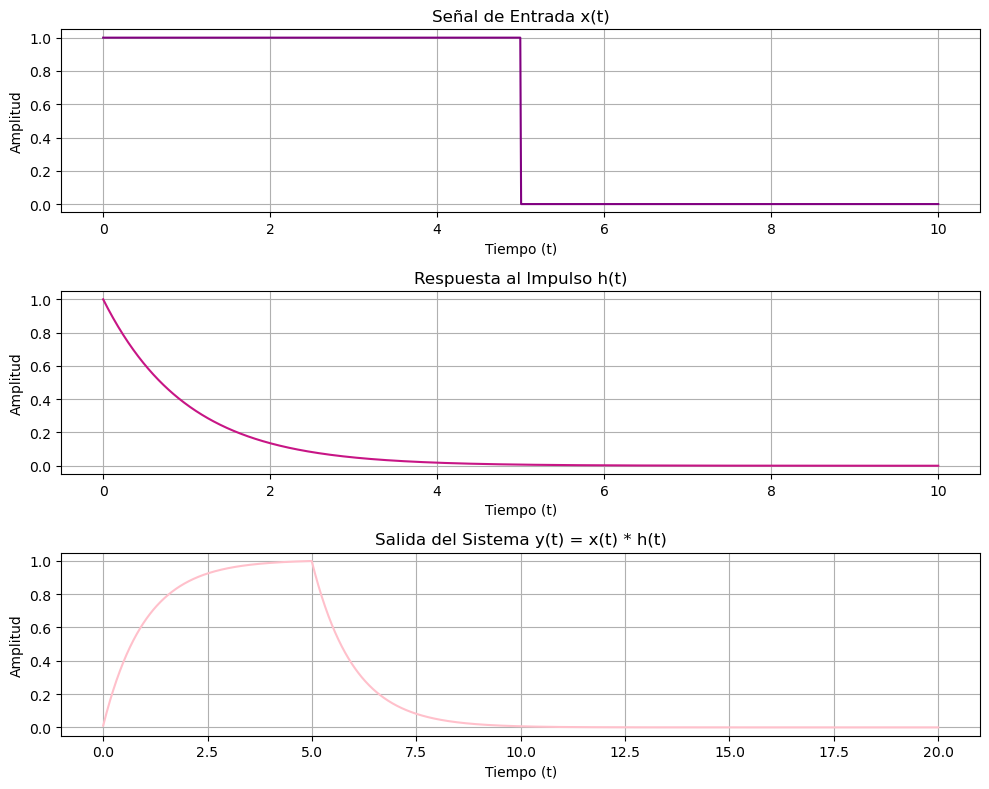

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los parámetros del problema
T = 5 # Duración del pulso rectangular
t = np.linspace(0, 10, 1000) # Definir el rango de tiempo

# Definir la señal de entrada x(t) - Pulso rectangular
def rectangular_pulse(t, T):
    return np.where((t >= 0) & (t <= T), 1, 0)

# Definir la respuesta al impulso h(t) - Exponencial decreciente
def impulse_response(t):
    return np.where(t >= 0, np.exp(-t), 0)

# Definir las funciones x(t) y h(t)
x_t = rectangular_pulse(t, T)
h_t = impulse_response(t)

# Realizar la convolución usando la función np.convolve
y_t = np.convolve(x_t, h_t, mode='full') * (t[1] - t[0]) # Ajuste para mantenet_conv = np.linspace(0, 2 * t[-1], len(y_t)) # Eje temporal para la convolució# Graficar las señales
t_conv = np.linspace(0,2*t[-1], len(y_t))
#Graficar las señales
plt.figure(figsize=(10, 8))

# Gráfico de la señal de entrada x(t)
plt.subplot(3, 1, 1)
plt.plot(t, x_t, label="x(t) - Pulso Rectangular", color='purple')
plt.title("Señal de Entrada x(t)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Amplitud")
plt.grid(True)

# Gráfico de la respuesta al impulso h(t)
plt.subplot(3, 1, 2)
plt.plot(t, h_t, label="h(t) - Respuesta al Impulso", color='mediumvioletred')
plt.title("Respuesta al Impulso h(t)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Amplitud")
plt.grid(True)

# Gráfico de la salida y(t) (convolución de x(t) y h(t))
plt.subplot(3, 1, 3)
plt.plot(t_conv, y_t, label="y(t) - Salida Convolucionada", color='pink')
plt.title("Salida del Sistema y(t) = x(t) * h(t)")
plt.xlabel("Tiempo (t)")
plt.ylabel("Amplitud")
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Tema 2

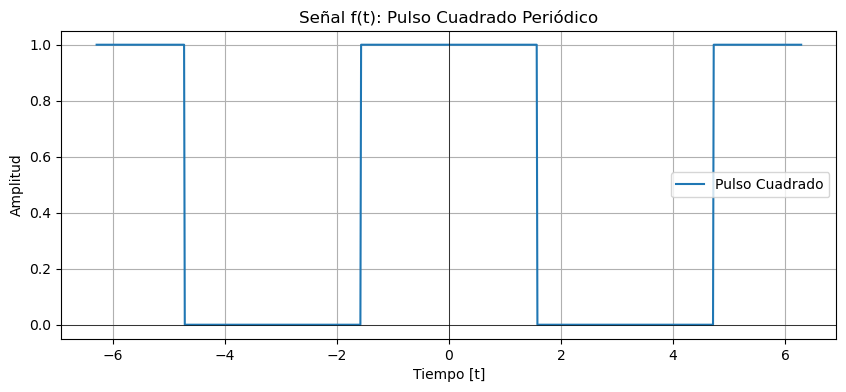

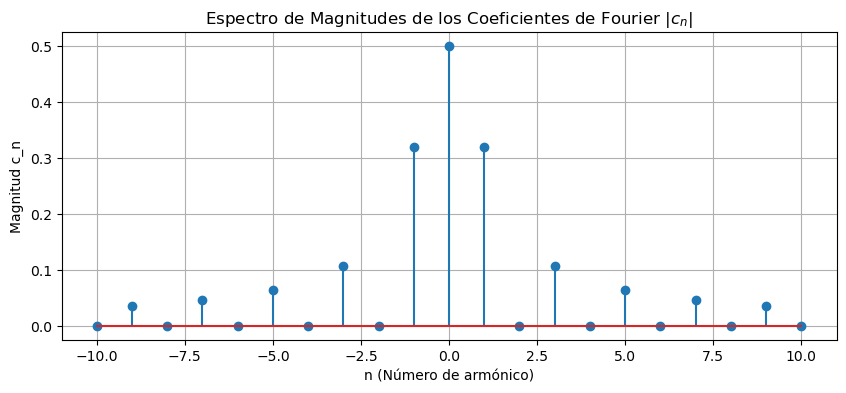

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal f(t)
def square_pulse(t):
    t=np.mod(t + np.pi, 2 * np.pi) - np.pi
    return np.where(np.abs(t) <= np.pi/2, 1, 0)
      
#Definir los coeficientes c_n
def fourier_coefficients(n):
    if n == 0:
        return 1/2
    elif n % 2 != 0: # Solo para los valores impares
        return np.sin(n * np.pi / 2) / (n * np.pi)
    else:
        return 0
    
# Graficar la señal f(t)
t = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
f_t = square_pulse(t)
plt.figure(figsize=(10, 4))
plt.plot(t, f_t, label='Pulso Cuadrado')
plt.title('Señal f(t): Pulso Cuadrado Periódico')
plt.xlabel('Tiempo [t]')
plt.ylabel('Amplitud')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.legend()
plt.show()

# Calcular y graficar el espectro de Fourier
n_values = np.arange(-10, 11) # Valores de n entre -10 y 10
c_n_values = np.array([fourier_coefficients(n) for n in n_values])

# Graficar el espectro de magnitudes
plt.figure(figsize=(10, 4))
plt.stem(n_values, np.abs(c_n_values))
plt.title('Espectro de Magnitudes de los Coeficientes de Fourier $|c_n|$')
plt.xlabel('n (Número de armónico)')
plt.ylabel('Magnitud c_n')
plt.grid(True)

plt.show()

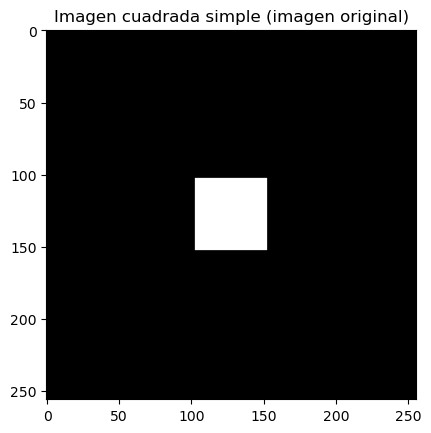

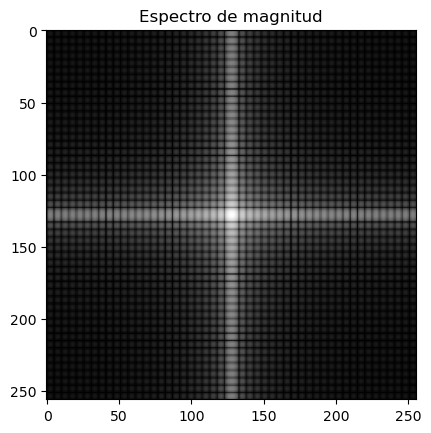

NameError: name 'coordenadas_fila' is not defined

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# 1. GENERA UNA IMAGEN CUADRADA SIMPLE
# Matriz de ceros. Definimos el tamaño 256*256
datos = np.zeros((256, 256), dtype=int)
# Definir el tamaño del cuadrado blanco
size_cuad = 50
# Calcular las coordenadas para centrar el cuadrado
inicio = (256 - size_cuad) // 2
fin = inicio + size_cuad
# Usar numpy para asignar el valor 1 (blanco) al cuadrado en el centro
datos[inicio:fin, inicio:fin] = 1
plt.imshow(datos, cmap='gray')
plt.title("Imagen cuadrada simple (imagen original)")
plt.show()

# 2. APLICA LA TRANSFORMADA DE FOURIER 2D
# Aplicar la Transformada de Fourier 2D
F = np.fft.fft2(datos)
# Centrar las bajas frecuencias en el medio de la imagen
F_desplazada = np.fft.fftshift(F)
# Calcular el espectro de magnitud
espectro_de_magnitud = np.log(np.abs(F_desplazada) + 1)
# Mostrar el espectro de magnitud
plt.imshow(espectro_de_magnitud, cmap='gray')
plt.title("Espectro de magnitud")
plt.show()

# 3. IMPLEMENTA UN FILTRO PASA BAJAS
# Obtener las dimensiones de los datos
filas, columnas = datos.shape
coordenadas_filas, coordenadas_columnas = filas // 2, columnas // 2 #Co
radio = 20 # Radio del filtro circular. Usar np.where() para crear el f
Y, X = np.ogrid[:filas, :columnas]
filtro = np.where((X - coordenadas_columnas)**2 + (Y - coordenadas_fila))
# Aplicar el filtro al espectro de Fourier
F_filtrado = F_desplazada * filtro
# Mostrar el espectro filtrado
plt.imshow(np.abs(F_filtrado), cmap='gray')
plt.title("Espectro de Fourier filtrado")
plt.show()
                                                   
#4. RECONSTRUYE LA IMAGEN FILTRADA
# Transformada inversa para recuperar la imagen filtrada
F_inverso_shift = np.fft.ifftshift(F_filtrado) # Deshacer el desplazami
imagen_filtrada = np.fft.ifft2(F_inverso_shift) # Transformada inversa
imagen_filtrada = np.abs(imagen_filtrada) # Obtener la parte real
                                                   
# Mostrar la imagen filtrada
plt.imshow(imagen_filtrada, cmap='gray')
plt.title("Imagen reconstruida")
plt.show()
                                                   

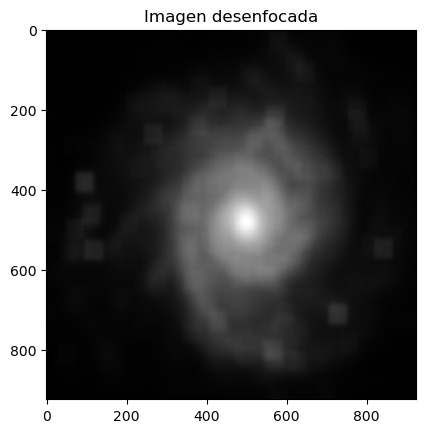

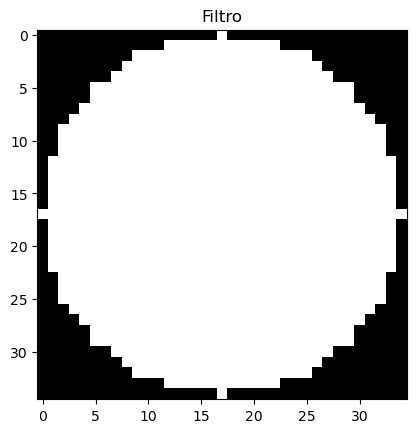

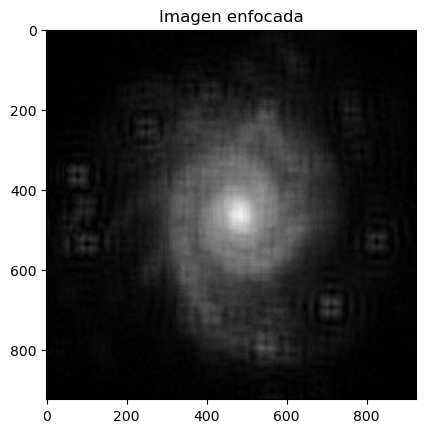

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2

def creacion_kernel(radio):

    # Definimos la longitud de los ejes sabiendo que tiene que ser igual al diámetro.
    diametro = np.arange(-radio, radio+1)
    X, Y = np.meshgrid(diametro, diametro)

    # Definimos el kernel como un círculo.
    kernel = np.sqrt(X**2 + Y**2) <= radio
    kernel = kernel/np.sum(kernel)
    return kernel

def deconvolucion_Wiener(imagen, filtro, k):

    # Realizamos las respectivas transformadas de Fourier.
    G = np.fft.fft2(imagen)
    H = np.fft.fft2(filtro, s=imagen.shape)

    # Sacamos el conjugado de H asi como su absoluto al cuadrado.
    H_conjugado = np.conj(H)
    H_abs = (abs(H))**2
    
    # Calculamos la imagen resultante.
    F = (H_conjugado * G)/(H_abs + k)

    # Realizamos la transformada inversa de la imagen la cual ya estará enfocada.
    imagen_transformada = np.fft.ifft2(F)
    imagen_enfocada = np.abs(imagen_transformada)
    return imagen_enfocada

def mostrar_resultados(imagen, filtro, imagen_enfocada):
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen desenfocada')
    plt.show()

    plt.imshow(filtro, cmap='gray')
    plt.title('Filtro')
    plt.show()

    plt.imshow(imagen_enfocada, cmap = 'gray')
    plt.title('Imagen enfocada')
    plt.show()


# Aqui empieza el Main.

# Abrimos la imagen con plt.imread.
imagen = plt.imread(r"C:\Users\pauuu\Downloads\img1 (1).png")

# Cambiar la imagen de RGB a escala de grises, siendo los coeficientes 0,... de los colores rojo, verde y azul respectivamente, solo si es RGB.
if len(imagen.shape) == 3:
    imagen = np.dot(imagen[...,:3], [0.299, 0.587, 0.114])

# Definimos las variables para ajustar el enfoque, radio como el radio del kernel y k como el parametro del ruido.
radio = 17
k = 0.005

filtro = creacion_kernel(radio)

imagen_enfocada = deconvolucion_Wiener(imagen, filtro, k)

# Finalmente representamos todos los resultados.
retultados = mostrar_resultados(imagen, filtro, imagen_enfocada)